In [286]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [287]:
salary_data=pd.read_csv("/content/sample_data/Salary_Data.csv")
salary_data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# EDA analysis 

In [288]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [289]:
salary_data.shape


(30, 2)

In [290]:
salary_data.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsExperience,30.0,5.313333,2.837888,1.1,3.20,4.7,7.70,10.5
Salary,30.0,76003.000000,27414.429785,37731.0,56720.75,65237.0,100544.75,122391.0


****** box plot for  YearsExperience column********


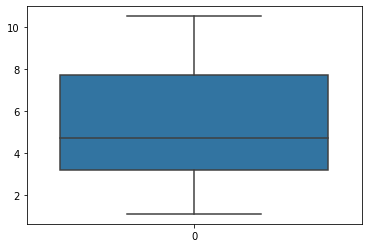

****** box plot for  Salary column********


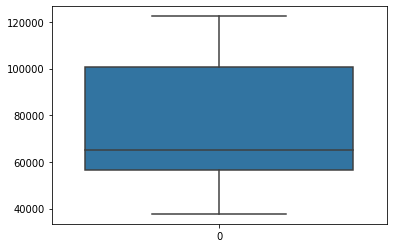

In [291]:
#boxplot for visualizing data and outliers
for i in salary_data.columns:
  print("****** box plot for ",i,"column********")
  sns.boxplot(salary_data[i])
  plt.show()

****** box plot for  YearsExperience column********


<ipython-input-292-42be8774ce8a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary_data[i])


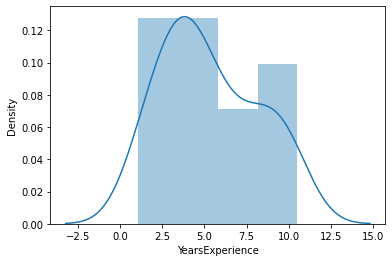

****** box plot for  Salary column********


<ipython-input-292-42be8774ce8a>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(salary_data[i])


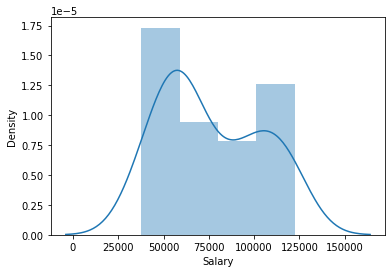

In [292]:
#distribution plot to check normal distributiob
for i in salary_data.columns:
  print("****** box plot for ",i,"column********")
  sns.distplot(salary_data[i])
  plt.show()

# **corelation analysis**

In [293]:
salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

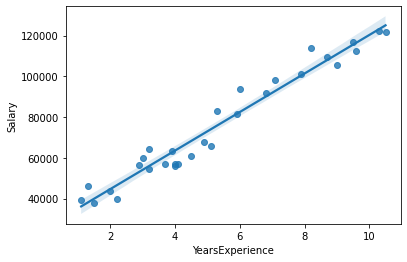

In [294]:
sns.regplot(x=salary_data['YearsExperience'],y=salary_data['Salary'])

# **model building using lineraRegression()**

In [295]:
#using OLS
import statsmodels.formula.api as smf
model=smf.ols('Salary~YearsExperience',data=salary_data).fit()
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [296]:
# Finding Pvalues and tvalues
print(model.tvalues,"\n",model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [297]:
# Finding Rsquared values
print(model.rsquared," \n ",model.rsquared_adj)

0.9569566641435086  
  0.9554194021486339


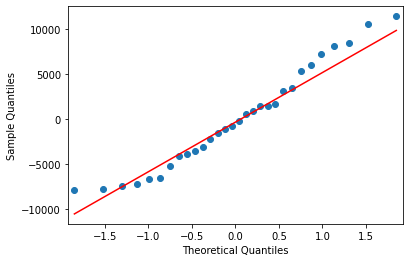

In [298]:
##testing
import statsmodels.api as sm
sm.qqplot(model.resid,line='q')
plt.show()

PREDICTION

In [299]:
#lets predict for 2 yr and 5 yr 
new_data=pd.Series([2,5])
new_data

0    2
1    5
dtype: int64

In [300]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred


,YearsExperience
0,2
1,5


In [301]:
model.predict(data_pred)

0    44692.124842
1    73042.011806
dtype: float64

In [302]:
#if we will do manually [Intercept 25792.200199][YearsExperience 9449.962321]
b0=25792.200199
b1=9449.962321
x=[2,5]
for i in x:
  print("prediction for {} years of experience ".format(i) )
  print(" =",b0+b1*i)

prediction for 2 years of experience 
 = 44692.124841
prediction for 5 years of experience 
 = 73042.01180400001


In [303]:
##lets do some transformation log,sqrt,qbrt
from sklearn.preprocessing import FunctionTransformer

In [304]:
salary_log=pd.read_csv("/content/sample_data/Salary_Data.csv")
salary_log.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [305]:
trf=FunctionTransformer(func=np.log1p)
salary_log['Exp_log']=trf.fit_transform(salary_log.YearsExperience)
salary_log.head()


,YearsExperience,Salary,Exp_log
0,1.1,39343.0,0.741937
1,1.3,46205.0,0.832909
2,1.5,37731.0,0.916291
3,2.0,43525.0,1.098612
4,2.2,39891.0,1.163151


In [306]:
model_log=smf.ols('Salary~Exp_log',data=salary_log).fit()
model_log.params

Intercept   -16452.302277
Exp_log      53271.412821
dtype: float64

In [307]:
print(model_log.rsquared,model_log.rsquared_adj)

0.8945639276190438 0.8907983536054382


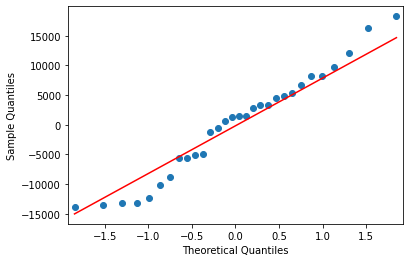

In [308]:
sm.qqplot(model_log.resid,line='q')
plt.show()

In [309]:
#prediction
new_data=pd.Series([np.log(2),np.log(5)])
data_pred=pd.DataFrame(new_data,columns=['Exp_log'])
model_log.predict(data_pred)

0    20472.627325
1    69284.729167
dtype: float64

In [310]:
#sqrt
trf2=FunctionTransformer(func=np.sqrt)
salary_sqrt=pd.read_csv("/content/sample_data/Salary_Data.csv")
salary_log.head()

,YearsExperience,Salary,Exp_log
0,1.1,39343.0,0.741937
1,1.3,46205.0,0.832909
2,1.5,37731.0,0.916291
3,2.0,43525.0,1.098612
4,2.2,39891.0,1.163151


In [311]:
salary_sqrt['Exp_sqrt']=trf2.fit_transform(salary_sqrt.YearsExperience)
salary_sqrt.head()

,YearsExperience,Salary,Exp_sqrt
0,1.1,39343.0,1.048809
1,1.3,46205.0,1.140175
2,1.5,37731.0,1.224745
3,2.0,43525.0,1.414214
4,2.2,39891.0,1.483240


In [312]:
model_sqrt=smf.ols('Salary~Exp_sqrt',data=salary_sqrt).fit()
print('params',"\n",model_sqrt.params)
print("Rsqr")
print(model_sqrt.rsquared,model_sqrt.rsquared_adj)

params 
 Intercept   -16055.769117
Exp_sqrt     41500.680583
dtype: float64
Rsqr
0.9310009544993526 0.9285367028743294


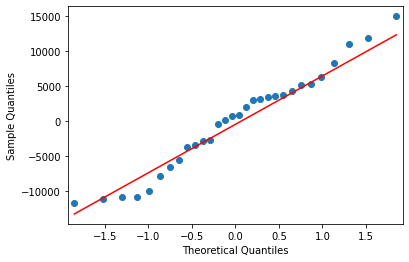

In [313]:
sm.qqplot(model_sqrt.resid,line='q')
plt.show()

In [314]:
#prediction
new_data=pd.Series([np.sqrt(2),np.sqrt(5)])
data_pred=pd.DataFrame(new_data,columns=['Exp_sqrt'])
model_sqrt.predict(data_pred)

0    42635.056211
1    76742.573779
dtype: float64

In [315]:
#cbrt
trf3=FunctionTransformer(func=np.cbrt)
salary_cbrt=pd.read_csv("/content/sample_data/Salary_Data.csv")
salary_cbrt.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [316]:
salary_cbrt['Exp_cbrt']=trf3.fit_transform(salary_cbrt.YearsExperience)
salary_cbrt_new=salary_cbrt.drop('YearsExperience',axis=1)
salary_cbrt_new.head()

,Salary,Exp_cbrt
0,39343.0,1.032280
1,46205.0,1.091393
2,37731.0,1.144714
3,43525.0,1.259921
4,39891.0,1.300591


In [317]:
model_cbrt=smf.ols('Salary~Exp_cbrt',data=salary_cbrt_new).fit()
print('params',"\n",model_cbrt.params)
print("Rsqr")
print(model_cbrt.rsquared,model_cbrt.rsquared_adj)

params 
 Intercept   -57049.503555
Exp_cbrt     78964.327230
dtype: float64
Rsqr
0.9113098800320786 0.90814237574751


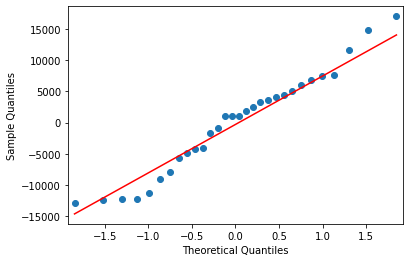

In [318]:
sm.qqplot(model_cbrt.resid,line='q')
plt.show()

In [319]:
#prediction
new_data=pd.Series([np.cbrt(2),np.cbrt(5)])
data_pred=pd.DataFrame(new_data,columns=['Exp_cbrt'])
model_cbrt.predict(data_pred)


0    42439.314513
1    77977.596654
dtype: float64